# Problem 1

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics.pairwise import euclidean_distances
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_openml
import nltk
from gensim.parsing import strip_tags, strip_numeric, strip_multiple_whitespaces, stem_text, strip_punctuation, remove_stopwords
from gensim.parsing import preprocess_string
from gensim import parsing
from sklearn.datasets import fetch_20newsgroups
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import TSNE

## MNIST - Dataset

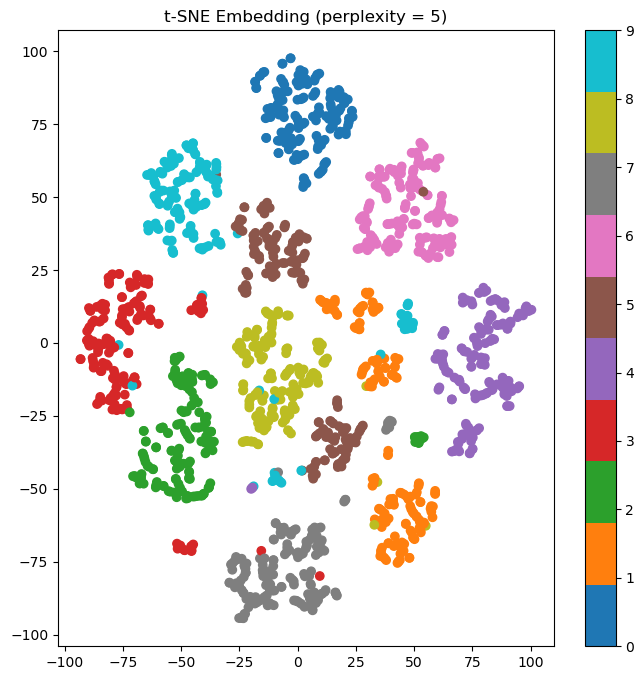

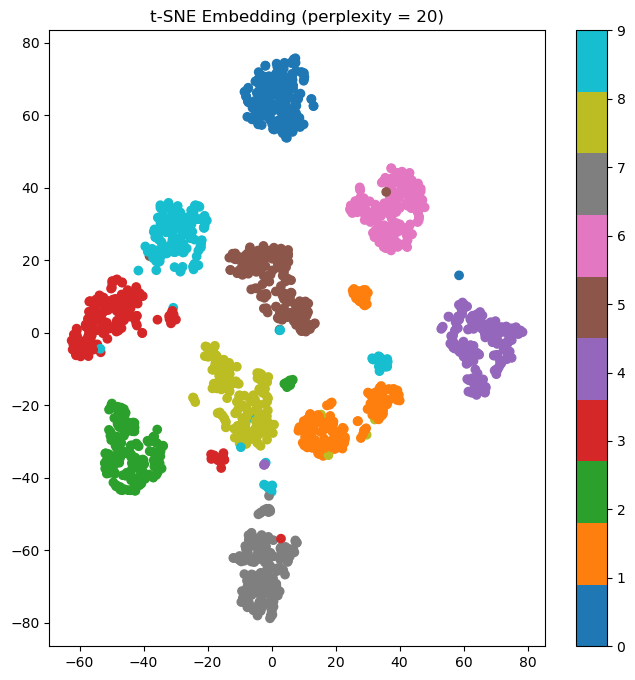

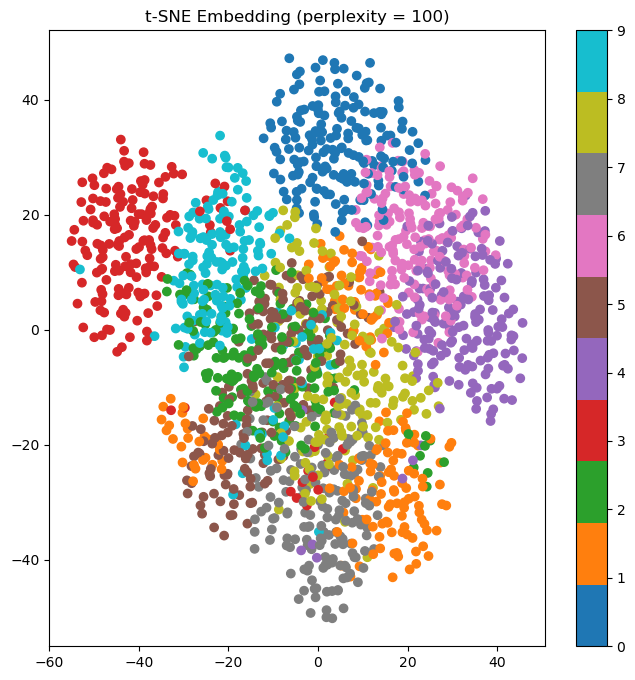

In [ ]:
# Load MNIST dataset
mnist = datasets.load_digits()

# Shuffle indices of the data array and select the first 10000 indices
idx = np.random.permutation(mnist.data.shape[0])[:10000]
X, y = mnist.data[idx], mnist.target[idx]

# Define perplexity values to use
perplexities = [5, 20, 100]

# Iterate over perplexities and plot embeddings
for i, perplexity in enumerate(perplexities):
    # Perform t-SNE with the given perplexity
    tsne = TSNE(n_components = 2 if i < 2 else 3, init = 'pca', perplexity = perplexity, random_state = 42)
    X_embedded = tsne.fit_transform(X)

    # Plot the embeddings with a different color for each label
    plt.figure(figsize = (8, 8))
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c = y, cmap = 'tab10')
    plt.colorbar()
    plt.title(f"t-SNE Embedding (perplexity = {perplexity})")
    plt.show()


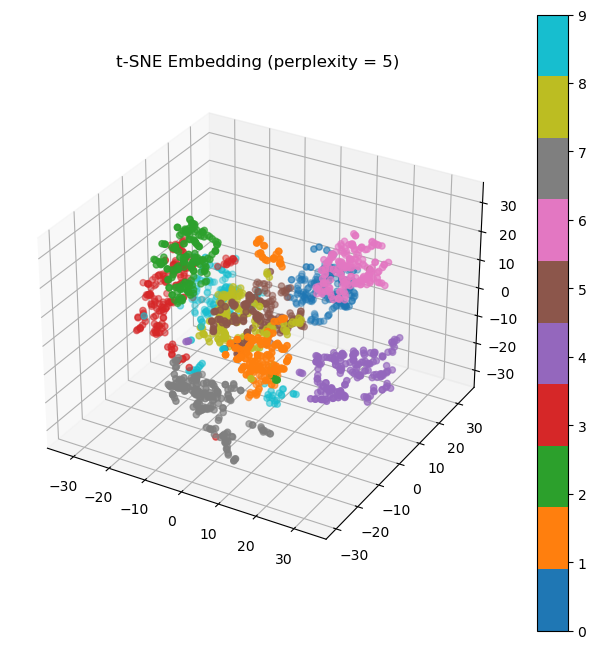

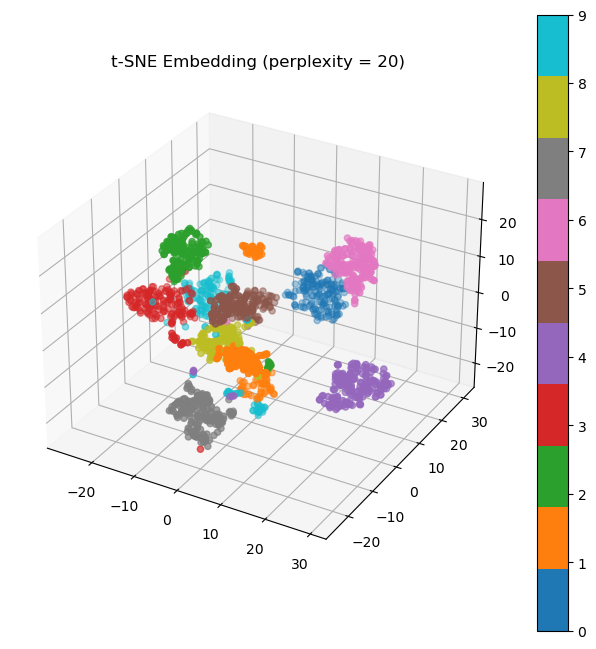

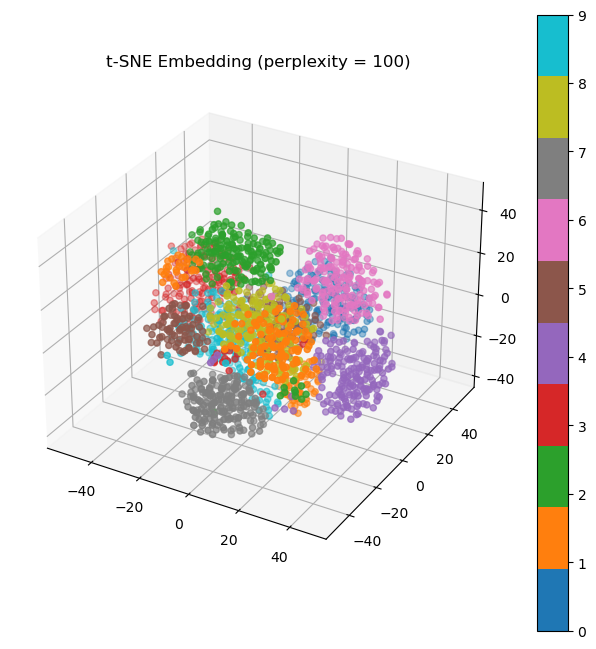

In [ ]:
# Load MNIST dataset
mnist = datasets.load_digits()

# Shuffle indices of the data array and select the first 10000 indices
idx = np.random.permutation(mnist.data.shape[0])[:10000]
X, y = mnist.data[idx], mnist.target[idx]

# Define perplexity values to use
perplexities = [5, 20, 100]

# Iterate over perplexities and plot embeddings
for i, perplexity in enumerate(perplexities):
    # Perform t-SNE with the given perplexity
    tsne = TSNE(n_components = 3, init = 'pca', perplexity = perplexity, random_state = 42)
    X_embedded = tsne.fit_transform(X)

    # Plot the embeddings with a different color for each label
    fig = plt.figure(figsize = (8, 8))
    ax = fig.add_subplot(111, projection = '3d')
    sc = ax.scatter(X_embedded[:, 0], X_embedded[:, 1], X_embedded[:, 2], c = y, cmap = 'tab10')
    plt.colorbar(sc)
    plt.title(f"t-SNE Embedding (perplexity = {perplexity})")
    plt.show()


## 20NG - Dataset

In [ ]:
transform_to_lower = lambda s: s.lower()
remove_emails = lambda s: re.sub(r'^[a-zA-Z0-9+_.-]+@[a-zA-Z0-9.-]+$', '', s)
remove_single_char = lambda s: re.sub(r'\s+\w{1}\s+', '', s)

CLEAN_FILTERS = [remove_emails,
                strip_tags,
                strip_numeric,
                remove_emails,
                strip_punctuation, 
                strip_multiple_whitespaces, 
                transform_to_lower,
                remove_stopwords]

def cleaningPipe(document):
    processed_words = preprocess_string(document, CLEAN_FILTERS)
    
    return processed_words

def joinList(processed_words):
    return ' '.join(processed_words)

def basicStemming(text):
    return parsing.stem_text(text)


newsgroups_train = fetch_20newsgroups(subset = 'train')
newsgroups_test = fetch_20newsgroups(subset = 'test')

ng_df_train = pd.DataFrame({"news" : newsgroups_train["data"] ,"class" : newsgroups_train["target"]})
ng_df_train["cleanedText"] = ng_df_train["news"].apply(cleaningPipe).apply(joinList).apply(basicStemming)
ng_df_train.head()


,news,class,cleanedText
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,lerxst wam umd edu s thing subject car nntp po...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,guykuo carson u washington edu gui kuo subject...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,twilli ec ecn purdu edu thoma e willi subject ...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,jgreen amber joe green subject weitek p organ ...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,jcm head cfa harvard edu jonathan mcdowel subj...


In [ ]:
ng_df_test = pd.DataFrame({"news" : newsgroups_test["data"] ,"class" : newsgroups_test["target"]})
ng_df_test["cleanedText"] = ng_df_test["news"].apply(cleaningPipe).apply(joinList).apply(basicStemming)
ng_df_test.head()

,news,class,cleanedText
0,From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. ...,7,vmbk ubvmsd cc buffalo edu neil b gandler subj...
1,From: Rick Miller <rick@ee.uwm.edu>\nSubject: ...,5,rick miller subject x face organ line distribu...
2,From: mathew <mathew@mantis.co.uk>\nSubject: R...,0,mathew subject strong weak atheism organ manti...
3,From: bakken@cs.arizona.edu (Dave Bakken)\nSub...,17,bakken cs arizona edu dave bakken subject saud...
4,From: livesey@solntze.wpd.sgi.com (Jon Livesey...,19,livesei solntz wpd sgi com jon livesei subject...


In [ ]:
num_points = 10000

ng_df_train = ng_df_train.iloc[:num_points,:]

vectorizer = TfidfVectorizer(stop_words = "english", min_df = 2)
X_train_ng = vectorizer.fit_transform(np.array(ng_df_train["cleanedText"]))

X_train = pd.DataFrame(X_train_ng.toarray())
y_train = np.array(ng_df_train["class"])

In [ ]:
num_points = 10000

ng_df_test = ng_df_test.iloc[:num_points,:]

X_test_ng = vectorizer.transform(np.array(ng_df_test["cleanedText"]))

X_test = pd.DataFrame(X_test_ng.toarray())
y_test = np.array(ng_df_test["class"])


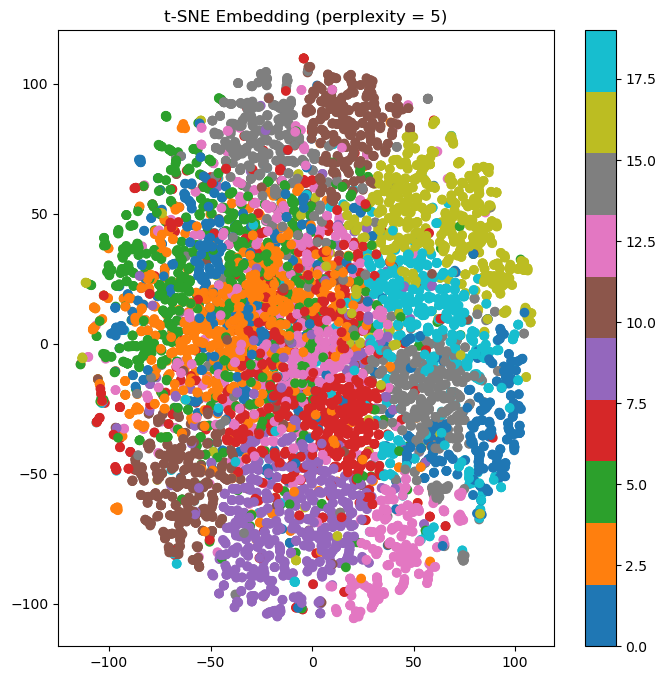

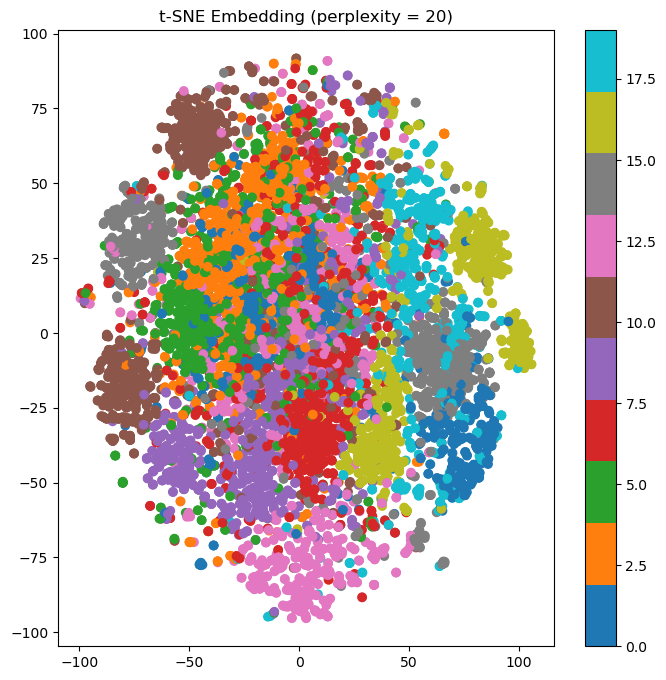

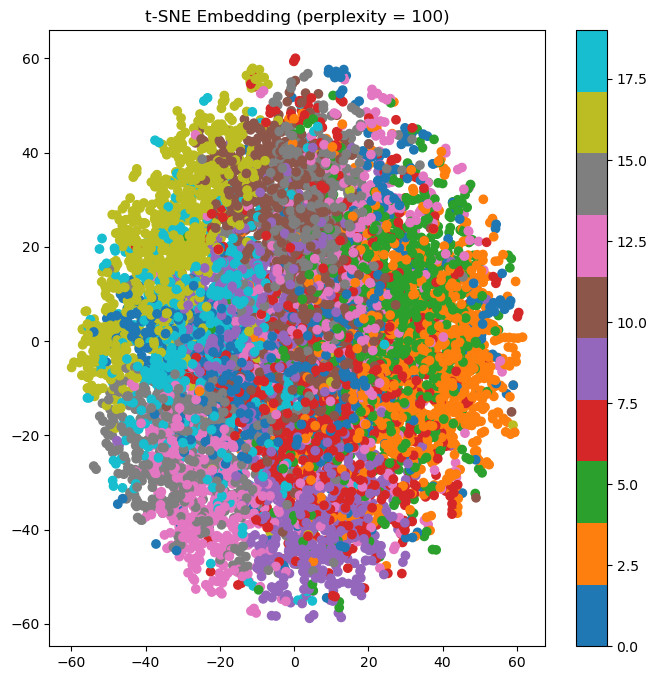

In [ ]:
# Define perplexity values to use
perplexities = [5, 20, 100]

# Iterate over perplexities and plot embeddings
for i, perplexity in enumerate(perplexities):
    # Perform t-SNE with the given perplexity
    tsne = TSNE(n_components = 2 if i < 2 else 3, init = 'pca', perplexity = perplexity, random_state = 42)
    X_embedded = tsne.fit_transform(X_train)

    # Plot the embeddings with a different color for each label
    plt.figure(figsize = (8, 8))
    scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c = y_train, cmap = 'tab10')
    plt.colorbar(scatter)
    plt.title(f"t-SNE Embedding (perplexity = {perplexity})")
    plt.show()

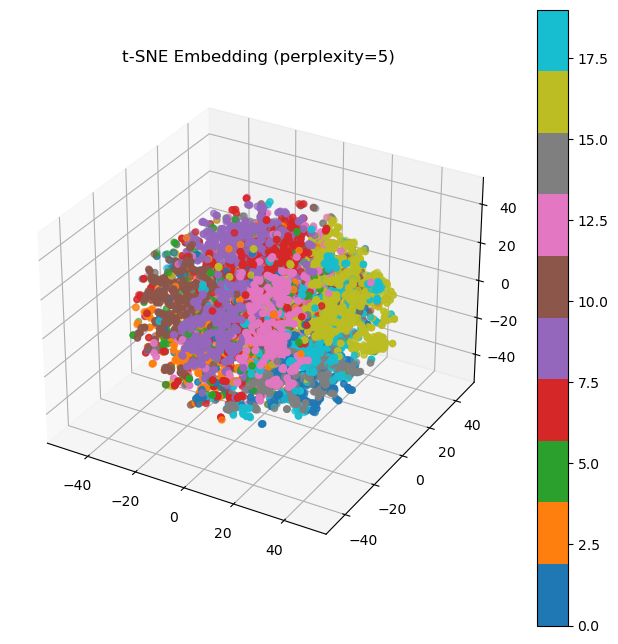

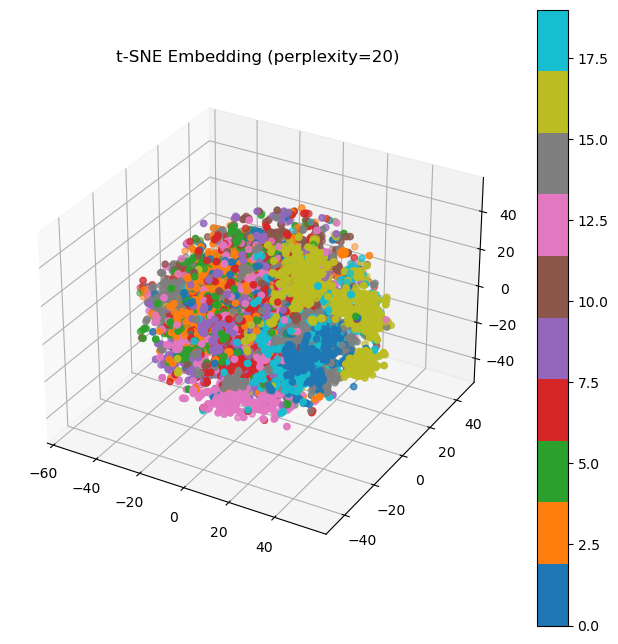

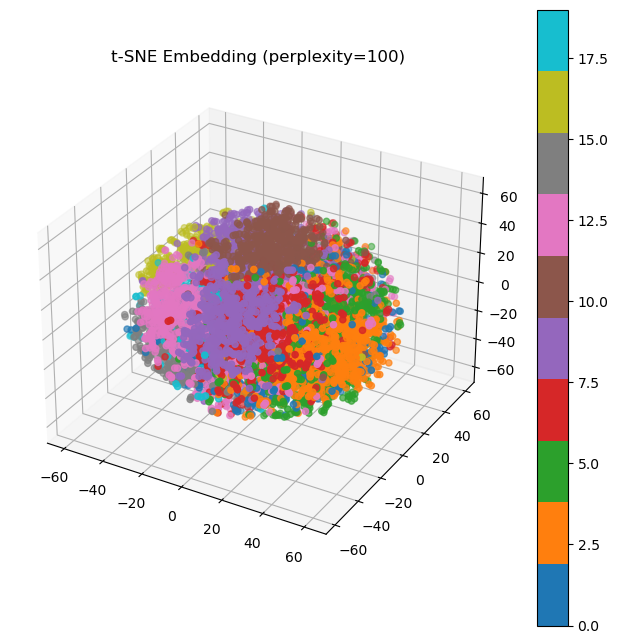

In [ ]:
# Import the required libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

# Define perplexity values to use
perplexities = [5, 20, 100]

# Iterate over perplexities and plot embeddings
for i, perplexity in enumerate(perplexities):
    # Perform t-SNE with the given perplexity
    tsne = TSNE(n_components = 3, init = 'pca', perplexity = perplexity, random_state = 42)
    X_embedded = tsne.fit_transform(X_train)

    # Plot the embeddings in 3D with a different color for each label
    fig = plt.figure(figsize = (8, 8))
    ax = fig.add_subplot(111, projection = '3d')
    scatter = ax.scatter(X_embedded[:, 0], X_embedded[:, 1], X_embedded[:, 2], c = y_train, cmap = 'tab10')
    plt.colorbar(scatter)
    plt.title(f"t-SNE Embedding (perplexity={perplexity})")
    plt.show()


# Problem 2

In [ ]:
# Perform feature selection using chi-squared test
selector = SelectKBest(chi2, k = 200)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Print the selected features
feature_names = vectorizer.get_feature_names_out()
selected_feature_names = [feature_names[i] for i in selector.get_support(indices = True)]
print(selected_feature_names)

['alaska', 'algorithm', 'allan', 'amanda', 'appl', 'arab', 'argic', 'armenia', 'armenian', 'atf', 'atheism', 'atheist', 'ax', 'bank', 'basebal', 'batf', 'beauchain', 'behanna', 'benedikt', 'bibl', 'bike', 'bmw', 'boni', 'bontchev', 'brave', 'bruin', 'bu', 'callison', 'car', 'card', 'cathol', 'cdt', 'centri', 'chastiti', 'chip', 'christ', 'christian', 'church', 'circuit', 'clayton', 'clh', 'clinton', 'clipper', 'coach', 'cramer', 'crypto', 'cryptographi', 'cub', 'cview', 'detroit', 'diet', 'diseas', 'doctor', 'dod', 'dog', 'drive', 'driver', 'dsl', 'duo', 'dx', 'dyer', 'encrypt', 'escrow', 'espn', 'faith', 'fbi', 'file', 'firearm', 'font', 'food', 'forsal', 'gai', 'game', 'geb', 'god', 'gordon', 'govern', 'graphic', 'greek', 'gtoal', 'gun', 'handgun', 'harlei', 'helmet', 'henri', 'hernlem', 'hitter', 'hockei', 'homosexu', 'iisi', 'imag', 'ini', 'intercon', 'irq', 'isa', 'islam', 'isra', 'israel', 'jaeger', 'jake', 'jesu', 'jew', 'kaldi', 'kei', 'keith', 'koresh', 'launch', 'lc', 'lciii'

In [ ]:
# Train logistic regression model
clf = LogisticRegression(penalty = 'l2', solver = 'lbfgs', max_iter = 10000, random_state = 42)
clf.fit(X_train_selected, y_train)

# Test model 
y_pred = clf.predict(X_test_selected)

# Test model and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


Accuracy: 0.6406001062134891


In [ ]:
# Perform feature selection using mutual information
selector = SelectKBest(mutual_info_classif, k = 200)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Print the selected features
feature_names = vectorizer.get_feature_names_out()
selected_feature_names = [feature_names[i] for i in selector.get_support(indices = True)]
print(selected_feature_names)

['access', 'advanc', 'algorithm', 'american', 'announc', 'appl', 'arab', 'argic', 'arm', 'armenia', 'armenian', 'articl', 'assert', 'atheist', 'attack', 'author', 'basebal', 'bat', 'batf', 'believ', 'bibl', 'biblic', 'bike', 'blood', 'brand', 'brave', 'bui', 'ca', 'caltech', 'car', 'card', 'caus', 'chastiti', 'chip', 'christ', 'christian', 'church', 'circuit', 'citizen', 'claim', 'clinton', 'clipper', 'code', 'color', 'com', 'condit', 'control', 'countri', 'crime', 'crimin', 'cup', 'dealer', 'death', 'dhq', 'digit', 'disk', 'displai', 'distribut', 'doctor', 'dod', 'drive', 'driver', 'drug', 'edu', 'electron', 'encrypt', 'enterpoop', 'escrow', 'evid', 'exist', 'fact', 'faith', 'fan', 'fax', 'fbi', 'file', 'firearm', 'forc', 'format', 'frank', 'ftp', 'game', 'geb', 'gilmour', 'god', 'gov', 'govern', 'graphic', 'gun', 'health', 'help', 'hitter', 'hockei', 'host', 'human', 'imag', 'islam', 'isra', 'israel', 'jesu', 'jew', 'jewish', 'kei', 'keith', 'kill', 'land', 'law', 'lc', 'leaf', 'leag

In [ ]:
# Train logistic regression model
clf = LogisticRegression(penalty = 'l2', solver = 'lbfgs', max_iter = 10000, random_state = 42)
clf.fit(X_train_selected, y_train)

# Test model 
y_pred = clf.predict(X_test_selected)

# Test model and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


Accuracy: 0.6103292618162507


# Problem 3

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

In [ ]:
# Ensure that X_train is a NumPy array
X_train = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
X_test = X_test.values if isinstance(X_test, pd.DataFrame) else X_test

# Run lasso regularization
model = Lasso(alpha=0.002)
model.fit(X_train, y_train)
new_features = np.argsort(np.absolute(model.coef_))[-200:]

# Print 200 of the new_features
print(np.asarray(vectorizer.get_feature_names_out())[new_features], '\n')

# Extract the features from the original dataset
X_train = X_train.T[new_features].T
X_test = X_test.T[new_features].T
print ('The shape of the new training set : ' , X_train.shape)
print ('The shape of the new test set : ' , X_test.shape)

l = LogisticRegression(penalty = 'l1', solver = 'lbfgs', max_iter = 10000).fit(X_train, y_train)

results = l.predict(X_test)
results2 = l.predict(X_train)

train_score = l.score(X_train, y_train)
print("Accuracy of Logistic Prediction for training: ", train_score , '\n')


score = l.score(X_test, y_test)
print("Accuracy of Logistic Prediction for testing: ", score , '\n')

['nation' 'burn' 'waco' 'saturn' 'umich' 'vga' 'bui' 'com' 'video' 'mb'
 'program' 'bike' 'uga' 'let' 'quadra' 'cwru' 'keyword' 'nl' 'rocket'
 'medic' 'year' 'ms' 'geb' 'win' 'disk' 'believ' 'comp' 'batf' 'engin'
 'kill' 'robert' 'fractal' 'hell' 'instal' 'sin' 'creat' 'screen' 'radio'
 'said' 'state' 'god' 'machin' 'beauchain' 'virginia' 'ibm' 'henri' 'sci'
 'dod' 'digex' 'treatment' 'bodi' 'cview' 'cosmo' 'appl' 'jake' 'duo'
 'freenet' 'vesa' 'citi' 'scout' 'motif' 'quot' 'ga' 'bu' 'po' 'tammi'
 'biblic' 'curv' 'launch' 'pitt' 'packag' 'speed' 'order' 'centri' 'area'
 'anybodi' 'arab' 'gvg' 'memori' 'speak' 'lc' 'run' 'utexa' 'law' 'org'
 'format' 'mathew' 'case' 'firearm' 'scsi' 'job' 'trial' 'risc' 'cathol'
 'dx' 'color' 'port' 'modem' 'simm' 'trw' 'libertarian' 'set' 'version'
 'man' 'jesu' 'printer' 'motherboard' 'homosexu' 'font' 'fact' 'doctor'
 'frank' 'anim' 'paul' 'articl' 'weiss' 'advanc' 'email' 'problem'
 'monitor' 'ax' 'cd' 'food' 'host' 'write' 'gai' 'rosicrucian' 'bloo